# Genetic Heritage Assignment

The following 7 strings were generated by taking an existing string and with a small probability either inserting a new character, deleting an existing character, or changing to a new character randomly. This created two “child” strings. Using those two children strings, and then four grandchildren for each child. Unfortunately the order of the strings has been lost.

In [1]:
genes = [('TTCTACGGGGGGAGACCTTTACGAATCACACCGGTCTTCTTTGTTCTAGCCGCTCTTTTTCATCAGTTGCAGCTAGTGCATAATTGCTCACAAACGTATC'),
         ('TCTACGGGGGGCGTCATTACGGAATCCACACAGGTCGTTATGTTCATCTGTCTCTTTTCACAGTTGCGGCTTGTGCATAATGCTCACGAACGTATC'),
         ('TCTACGGGGGGCGTCTATTACGTCGCCAACAGGTCGTATGTTCATTGTCATCATTTTCATAGTTGCGGCCTGTGCGTGCTTACGAACGTATTCC'),
         ('TCCTAACGGGTAGTGTCATACGGAATCGACACGAGGTCGTATCTTCAATTGTCTCTTCACAGTTGCGGCTGTCCATAAACGCGTCCCGAACGTTATG'),
         ('TATCAGTAGGGCATACTTGTACGACATTCCCCGGATAGCCACTTTTTTCCTACCCGTCTCTTTTTCTGACCCGTTCCAGCTGATAAGTCTGATGACTC'),
         ('TAATCTATAGCATACTTTACGAACTACCCCGGTCCACGTTTTTCCTCGTCTTCTTTCGCTCGATAGCCATGGTAACTTCTACAAAGTTC'),
         ('TATCATAGGGCATACTTTTACGAACTCCCCGGTGCACTTTTTTCCTACCGCTCTTTTTCGACTCGTTGCAGCCATGATAACTGCTACAAACTTC')]

## Question 1
> Write python code to give the length of the longest common subsequence for two strings.

In [2]:
import pandas as pd
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

gene_network = mpimg.imread('genetic_map3.png')
gene_tree = mpimg.imread('genetic_map2.jpeg')

In [3]:
# reference: https://www.geeksforgeeks.org/longest-common-substring/

def LCS(X, Y, lenX, lenY):
    """
    Finds the length of the longest common substring of X and Y.
    """
    LCS_table = [[0 for x in range(lenY + 1)] for y in range(lenX + 1)]
    result = 0

    for i in range(lenX + 1):
        for j in range(lenY + 1):
            if (i == 0 or j == 0):
                LCS_table[i][j] = 0
                
            elif (X[i - 1] == Y[j - 1]):
                LCS_table[i][j] = LCS_table[i - 1][j - 1] + 1
                result = max(result, LCS_table[i][j])
                
            else:
                LCS_table[i][j] = max(LCS_table[i - 1][j], LCS_table[i][j - 1])
                
    return result, LCS_table        

## Question 2
> Generate the table of the lengths of the longest common subsequences for every pair of strings.

In [4]:
def gene_stats(genes):
    """
    Prints a table with the length of the longest common substring
    between each of the genes in the input array.
    """
    i_X = -1
    i_Y = -1
    n = 7
    gene_index = ("XString0", "XString1", "XString2", "XString3", "XString4",
                  "XString5", "XString6")
    gene_column = ("YString0", "YString1", "YString2", "YString3", "YString4",
                   "YString5", "YString6")
    LCS_counter = pd.DataFrame(index=gene_index, columns=gene_column)
    
    for Xgene in genes:
        i_X += 1
        i_Y = -1
        for Ygene in genes:
            i_Y += 1
            lenX = len(Xgene)
            lenY = len(Ygene)
            LCS_num, LCS_table = LCS(Xgene, Ygene, lenX, lenY)
            
            if i_X == i_Y:
                LCS_num = None
                
            LCS_counter.iloc[i_X][i_Y] = LCS_num
    
    print "Count of shared substrings\n__________________________\n"
    print LCS_counter
    
    return LCS_counter
            
LCS_count_df = gene_stats(genes) 

Count of shared substrings
__________________________

         YString0 YString1 YString2 YString3 YString4 YString5 YString6
XString0     None       82       73       72       72       70       80
XString1       82     None       83       81       67       65       70
XString2       73       83     None       73       62       61       67
XString3       72       81       73     None       62       60       63
XString4       72       67       62       62     None       71       82
XString5       70       65       61       60       71     None       79
XString6       80       70       67       63       82       79     None


## Question 3
> Manually examine the table, and infer the relationships between strings.

To be better able to infer the relationships I have made a network graph with edges colored based on the overlap between gene sequences found in question 2. From this graph we can clearly see that **0** seems to be the parent gene with **6** and **1** as it's children. The third generation of genes then consists of **5 & 4** and **3 & 2** respectively.

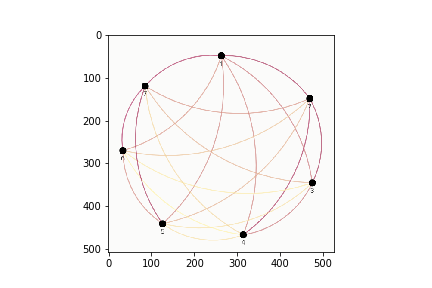

In [5]:
imgplot = plt.imshow(gene_network)
plt.show()

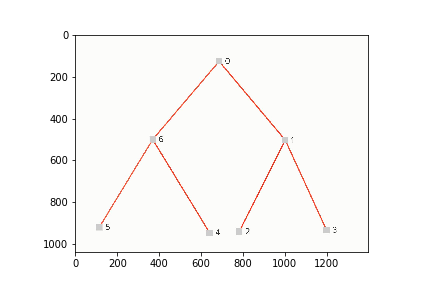

In [6]:
imgplot2 = plt.imshow(gene_tree)
plt.show()

## Question 4
> How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)

To find the probability of insertions, deletions and mutations, we want to use the hierarchy we are able to infer from the algorithm in question 5 and compare each parent to it's two children seperately. 

We align the strings based on their LCS and then go through each string and look at the items that are *not* part of the LCS, let's call those nLCS. If an item is in the parent's nLCS, but not the childs, we know it has been deleted. If it is in the child's string, but not the parent's, we know it has been inserted.

If a different string appears in both the childs' and the parent's nLCS, we know it has been mutated. Mutation could also be an insertion and deletion at the same time, but we assume that only one of those operations can occur on any given protein at a time.

An example of this would be:

**A** B C D E _ F **G**  <- Parent

_ B C D E **C** F **H**  <- Child

Here we see A being in the parent's nLCS, but not the child's, C being in the child's but not the parent's nLCS and G and H being a different string in both the parent's and childs' nLCS.

To now determine the probability of each of those, our algorithm would count the number of insertions, deletions and mutations across the entire gene tree and then divide the total by the length of all parent strings combined. That will leave us with the average probability of insertion, deletion and mutation at each protein.

## Question 5
> Can you devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.

Based on the assumption that the first genetic generation will have the strongest resemblance to all other genes (after all, it is the original string), I tested if I could determine generation based on average overlap.

Gene | Average resemblance
---|---
0 | 74.8
1 | 74.6
6 | 73.5
2 | 69.8
4 | 69.3
3 | 68.5
5 | 67.7


Based on these averages we could determine that *0* is the first generation gene, *1 & 6* are second generation and the rest make up the third generation, just as the manual analysis of the network graph showed.
After our algorithm determines the generation of each gene it then just has to traverse the gene line by determining the strongest two connections of the first, second, etc. generation until it reaches the bottom of the tree.

Our solution is based on very little data and it is unsure whether the above assumptions would hold for many generations. Depending on how strong the mutations and how long the gene strings, they might accidentally resemble previous generations' after a while. The algorithm also has no way of determining a tie breaker and we would have to manually determine those.

## Question 6
> Describe the complexity of your solution to identify related “genes” for this assignment. (Let M be the length of a gene, and N be the number of genes.)

Our original algorithm LCS() has a complexity of O(ab) to determine the length of the longest common substring of two genes, where *a* and *b* are the lengths of each gene respectively. 
Let's simplify this to O(M^2). We ran this algorithm 49 times to fill each value in the table above, for a total of N^2 times. Strictly speaking half the values are redundant and we only had to run the algorithm about N^2/2 times, but for complexity, that makes little difference.
Hence, to produce our table, we have O(N^2 * M^2) complexity.

The gene tree traversing algorithm described in question 5 would need to first calculate the averages for each gene, taking roughly O(N^2) to do so and then traverse through the original table once for each gene to find it's two successors, also taking O(N^2). Given that most genes will be at the bottom of the tree, however, and don't need to be searched for their children, this is closer to O(N^2/2).

Overall now, we get: O(N^2 `*` M^2) + O(N^2) + O(N^2/2) = **O(N^2 * M^2)**